# Mapeos en 1d

---

**NOTA** Los ejercicios de este capítulo consituyen la tarea 3. Estos ejercicios involucran que ustedes escriban código que debe ejecutarse correctamente para responder las preguntas que se formulan en los ejercicios. El código debe estar correctamente documentada o al menos comentado, y en general se deben definir funciones que realicen cosas concretas.

**Fecha límite de envío inicial del PR:** lunes 12 de septiembre

**Fecha límite de aceptación del PR:** lunes 26 de septiembre

---

## Órbitas

Iniciaremos el estudio de sistemas dinámicos considerando *mapeos* en una dimensión. Los mapeos en una dimensión son simplemente aplicaciones de $F_\mu : \mathbb{R} \rightarrow \mathbb{R}$, de la forma

\begin{equation}
x_{n+1} = F_\mu (x_n).
\end{equation}

Aquí, $x_n$ representa el estado del sistema al "tiempo" $n$.

Por ahora, la única suposición importante para $F_\mu$ es que es una función que **no** involucra ningún tipo de variable estocástica o nada aleatorio. En este caso diremos que el sistema es determinista: el estado al "tiempo" $n+1$ sólo depende del estado al tiempo $n$, y de los parámetros $\mu$ del mapeo (que permanecen constantes respecto al tiempo).


*Iterar* la función $F_\mu(x)$ significa evaluarla una y otra vez, a partir de un valor inicial $x_0$ que llamaremos *condición inicial*. Esto lo escribiremos como $x_1=F_\mu(x_0)$ para el primer iterado, $x_2=F^2_\mu(x_0)=F_\mu(x_1)$ para el segundo, y en general, para el $n$-nésimo iterado escribiremos $x_n=F^n_\mu(x_0)$.

Por ejemplo, para $F(x)=x^2+1$, y omitiéndo el subíndice 0, tendremos
\begin{eqnarray}
F^2(x) & = & (x^2+1)^2+1,\\
F^3(x) & = & ((x^2+1)^2+1)^2+1,\\
F^4(x) & = & (((x^2+1)^2+1)^2+1)^2+1,
\end{eqnarray}
etc.

Hablaremos de una órbita como la secuendia de iterados, es decir, $x_0, x_1, x_2, \dots$. Así, para el ejemplo anterior con $x_0=0$ tendremos $x_1=1$, $x_2 = 2$, $x_3 = 5$, $x_4 = 26$, etc. Esta órbita, aparentemente tiende a infinito con $n\to\infty$.

Hay varios tipos de órbitas. Como veremos, unas órbitas particularmente importantes son los puntos fijos, los cuales satisfacen la ecuación
\begin{equation}
F_\mu(x) = x.
\end{equation}

Así, para $F(x)=x^2-x-4$, los puntos fijos satisfacen $x^2-2x-4=0$, cuyas soluciones son $1\pm\sqrt{5}$.

Numéricamente, y usando que conocemos los puntos fijos, tenemos:

In [1]:
f(x) = x^2-x-4

f(1+sqrt(5))-(1+sqrt(5)), f(1-sqrt(5))-(1-sqrt(5))

(0.0,4.440892098500626e-16)

De aquí vemos que hay ciertos errores numéricos que no permiten concluir que la segunda solución es punto fijo. Sin embargo, usando números de precisión extendida, vemos que con más bits de precisión, $f(x)-x$ se acerca a cero.

In [2]:
get_bigfloat_precision()

256

In [3]:
f(1-sqrt(BigInt(5)))-(1-sqrt(BigInt(5)))

6.908934844075555700309081490240319656892800291549025108018962776134873442529942e-77

Otro tipo importante de órbitas son las órbitas periódicas. En este caso tenemos que una secuencia *finita* de iterados, se repite: $x_0, x_1, \dots, x_{n-1}, x_0, x_1, \dots$. El menor número de puntos de una órbita periódica (sin repeticiones) es lo que se llama periodo. Cada punto de dicha órbita es periódico con periodo $n$.

Vale la pena notar que los puntos fijos son de periodo 1.

Un punto que pertenece a una órbita de periodo $n$ satisface la ecuación $F^n(x_0) = x_0$. Esto es, un punto de periodo $n$ del mapeo $F$, es un punto fijo del mapeo $F^n$.

Un punto $x_0$ se llama *eventualmente periódico* cuando, sin ser punto fijo o periódico, después de un cierto número finito de iteraciones, los iterados pertenecen a una órbita periódica. Un ejemplo, para el mapeo $F(x)=x^2-1$, es $x_0=1$: $F(1)=0$, $F^2(0)=-1$, $F^3(-1)=0$, etc.

En sistemas dinámicos típicos, la mayoría de los puntos no son fijos ni periódicos. Por ejemplo, el mapeo $T(x)=2x$ tiene como punto único punto fijo $x^*=0$. Cualquier otra órbita tiende a $\;\pm\infty$, ya que $T^n(x_0) = 2^n x_0$ y entonces $|T^n(x_0)|\to\infty$. 

En general, la situación es aún más compleja e interesante.

In [9]:
#using PyPlot;

**Ejercicio 1:** 

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?


In [14]:
f(x)=x^2-2
map1=Float64[]
map2=Float64[]
map3=Float64[]
x01=0.0
x02=0.1
x03=0.01
x1=f(x01)
x2=f(x02)
x3=f(x03)
for i in 1:50
    push!(map1,x1),push!(map2,x2),push!(map3,x3)
    x1=f(x1)
    x2=f(x2)
    x3=f(x3)
end;

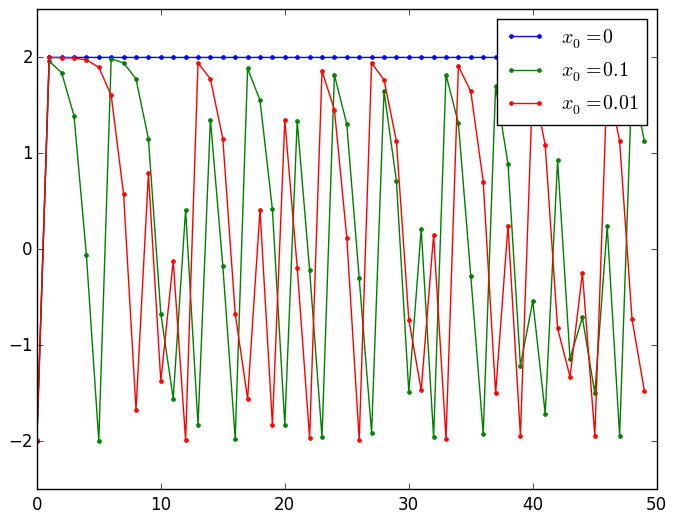

In [27]:
plot(map1,".-",label=L"$x_0=0$")
plot(map2,".-",label=L"$x_0=0.1$")
plot(map3,".-",label=L"$x_0=0.01$")
legend()
ylim(-2.5,2.5);

## Análisis gráfico

A continuación ilustraremos una manera gráfica de visualizar la dinámica en un mapeo de un grado de libertad. Para esto hay que instalar alguna (o varias) paqueterías gráficas. En lo que sigue yo utilizaré el paquete `Plots.jl`; la documentación oficial se encuentra [aquí](https://juliaplots.github.io), y hay un [video](https://www.youtube.com/watch?v=LGB8GvAL4HA) donde se explican detalles del funcionamiento. Yo la utilizaré para usar como *backend* [`PyPlot.jl`](https://github.com/stevengj/PyPlot.jl), aunque hay varios más que ustedes pueden libremente elegir.

Antes que nada, deben instalar la paquetería. Dado que `Plots.jl` es un paquete *registrado*, uno lo puede instalar simplemente con:

```julia
    Pkg.add("Plots")
```

También instalaremos otras dos paqueterías útiles:
```julia
    Pkg.add("PlotRecipes")  # Instala una paquetería auxiliar
    Pkg.add("PyPlot")       # Instala PyPlot, que usaré como *backend*
```

Otros *backends* interesantes son `Plotly` y `GR`.

Para usarla la debemos cargar con el comando:

In [1]:
using Plots, PlotRecipes

    +(AbstractArray, DataArrays.DataArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


In [29]:
# Esto define a `PyPlot.jl` como el *backend* que usaremos
# Puede tardar un poco en cargarse, especialmente la primer vez que se usa.
pyplot()

Plots.PyPlotBackend()

Otros *backends* pueden usarse llamando el nombre del *backend* concreto. Por ejemplo:

```julia
gr()       # carga GR
plotly()   # carga Plotly
```
    
Los backends tienen que estar instalados.

Cargamos el paquete `LaTeXStrings.jl`, que normalmente ha sido instalado por `PyPlot.jl`. Sirve para poner cadenas de caractéres, en LaTex, para los ejes o los títulos.

In [30]:
using LaTeXStrings

La idea del análisis gráfico es poder visualizar los iterados de una órbita. En el eje de las abscisas dibujaremos $x_n$ y en el de las ordenadas dibujaremos $F(x_n)$. Entonces, para localizar $x_{n+1}$ simplemente necesitamos la gráfica de $y=F(x)$.


Como ejemplo usaremos $F(x) = \sqrt{x}$.

In [31]:
x0 = 5.0*rand()
x1 = sqrt(x0)

rangox = 0.0:1/32:5.2

x0

2.076049752539938

In [33]:
# Se tarda un poco porque inicializa varias cosas internamente;
# entre otras cosas, carga PyPlot.

# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=("x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), "F(x)"), 
legend=false, title="F(x)=sqrt{x}", grid=false)

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=(:orange), marker=:dot)


LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension',)
  File "/Users/usuario/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3099, in plot
    ret = ax.plot(*args, **kwargs)
  File "/Users/usuario/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1373, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/usuario/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 304, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/Users/usuario/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 282, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/Users/usuario/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[33], in expression starting on line 5

Para visualizar el valor $x_1$ en el eje `x`, usamos la identidad, i.e., la recta $y=x$. Noten el ligero cambio para que los ejes y el título aparezcan más agradables.

In [ ]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

# Dibuja x_0 -> x_1 = F(x_0)
plot!([x0, x0, -0.5], [-0.5, x1, x1], color=:orange, lw=2.0, marker=:point)
# Dibuja x_1 -> Id(x_1) = x_1
plot!([-0.5, x1, x1], [x1, x1, -0.5], line=(:green, :dash, 2.0, 0.4))


Dado que tenemos $x_1$ en el eje $x$, el mismo proceso de antes puede ser implementado para obtener $x_2$, o cualquier otro iterado $x_n$. Sin embargo, vale la pena notar que, una vez que estamos en la diagonal, podemos ir a la función para obtener $x_2$, y nuevamente a la diagonal y a la función para tener $x_3$, etc.

In [ ]:
x2 = sqrt(x1)

In [ ]:
# Dibuja F(x) y define escalas, etc
plot(rangox, sqrt, 
    xaxis=(L"x", (0.0, 5.0), 0:5.0), 
    yaxis=((0.0, 3.0), L"F(x)"), 
    legend=false, title=L"F(x)=\sqrt{x}", grid=false)
plot!(rangox, x->x, color=:red) 

plot!([x0, x0, x1, x1, x2], [-0.5, x1, x1, x2, x2], 
line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))


**Ejercicio 2:** Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

Obviamente, los puntos fijos de un mapeo pueden ser obtenidos del análisis gráfico descrito: sólo basta encontrar las intersecciones de la recta identidad con la función del mapeo.

Vale la pena enfatizar que, si bien el análisis gráfico es útil, no sirve para *comprobar* propiedades sobre la dinámica del mapeo, aunque sirve para entender detalles de ésta.

**Ejercicio 3:** 

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

**Ejercicio 4:**

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

**Ejercicio 5:**

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

# Puntos fijos

Como dijimos antes, el análisis gráfico es útil pero no necesariamente riguroso. 

Un resultado riguroso (¡teorema!) que es útil para encontrar puntos fijos es el **teorema del valor intermedio**:

Supongamos que $F:[a,b]\to\mathbb{R}$ es *continua*, y que $y_0$ se encuentra entre $F(a)$ y $F(b)$. Entonces, existe un punto en $x_0\in[a,b]$ tal que $F(x_0)=y_0$.



Una consecuencia de este teorema es el teorema del punto fijo.

**Teorema del punto fijo**

Supongamos que $F:[a,b]\to[a,b]$ es *continua*. Entonces, existe un punto para $F$ en $[a,b]$. 

Algunos comentarios:

- El teorema asienta la existencia de un punto fijo; puede haber más.

- El teorema asume que $F$ es *continua* y que mapea al interval $[a,b]$ en si mismo.

- El intervalo $[a,b]$ es *cerrado*.

- El teorema **no** dice cómo encontrar a los puntos fijos.

La prueba se basa en aplicar el teorema del punto intermedio a la función $H(x)=F(x)-x$ y mostrar que existe un valor $x_0$ tal que $H(x_0)=0$. $H(x)$ es continua en el intervalo $[a,b]$ (así que se satisfacen las hipótesis del teorema del punto intermedio) y satisface $H(a) = F(a)-a \ge 0$ y $H(b)=F(b)-b\le 0$. (Estas propiedades se satisfacen ya que $F:[a,b]\to[a,b]$. 

Como vimos en los ejercicios, los puntos fijos aveces *atraen* puntos cercanos, a veces los *repelen*, y otras veces hay cierta atracción o repulsión.

A fin de entender las cosas, consideremos el siguiente mapeo *lineal*:

\begin{equation}
F_\alpha(x) = \alpha x,
\end{equation}

con $0<\alpha <1$.

*Obviamente*, $x^*=0$ es un punto fijo del mapeo.

In [ ]:
using Plots, LaTeXStrings

pyplot()

In [ ]:
# Definición del mapeo
f(x, α) = α * x

Veamos cuál es la dinámica cerca del origen:

In [ ]:
"""
    iteramapeo(f, x0, n)

Esta función itera el mapeo `f`, usando como condición inicial `x0`, `n` veces
y regresa dos vectores que continen la secuencia de puntos, incluyendo las
*visitas* a la diagonal.
"""
function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

In [ ]:
const α = 0.6
fα = x -> f(x, α)

In [ ]:
x1α, fx1α = iteramapeo(fα, 0.8, 10); 
x2α, fx2α = iteramapeo(fα, -0.8, 10); 

In [ ]:
plot(-1:1/32:1, fα, xaxis=(L"x", (-1.0, 1.0)), yaxis=L"F_\alpha(x)")
plot!(-1:1/32:1, identity)
plot!(x1α, fx1α, marker=(:dot, 3, 0.4))
plot!(x2α, fx2α, marker=(:dot, 3, 0.4))

In [ ]:
fx1α[end], fx2α[end]

Como puede observarse, los puntos *convergen*, o son atraídos al punto fijo $x^*=0$.

Consideremos ahora el caso $\alpha>1$.

In [ ]:
const β = 2.2
fβ = x -> f(x, β)

In [ ]:
x1β, fx1β = iteramapeo(fβ, 0.08, 8); 
x2β, fx2β = iteramapeo(fβ, -0.08, 8); 

In [ ]:
plot(-1:1/32:1, fβ, grid=:false, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\beta(x)", (-1.0, 1.0)))
plot!(-1:1/32:1, identity)
plot!(x1β, fx1β, marker=(:dot, 3, 0.4))
plot!(x2β, fx2β, marker=(:dot, 3, 0.4))


In [ ]:
fx1β[end], fx2β[end]

Claramente, los iterados de un punto cercano al punto fijo $x^*=0$ se alejan de él. Uno dice que el punto fijo los *repele*.

De igual manera podemos hacer el análisis para casos en que el parámetro sea negativo.

In [ ]:
const γ = -0.6
fγ = x -> f(x, γ)

const δ = -1.2
fδ = x -> f(x, δ)

In [ ]:
x1γ, fx1γ = iteramapeo(fγ, 0.8, 14); 
x1δ, fx1δ = iteramapeo(fδ, 0.08, 14); 

# xx = [x1γ x1δ];
# fxx = [fx1γ fx1δ];

In [ ]:
plot(-1:1/32:1, fγ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\gamma(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1γ, fx1γ, marker=(:dot, 3, 0.4))

In [ ]:
plot(-1:1/32:1, fδ, xaxis=(L"x", (-1.0, 1.0)), yaxis=(L"F_\delta(x)", (-1.0, 1.0)))
plot!([-1:1/32:1 -1:1/32:1], [-1:1/32:1 -1:1/32:1], layout=2)
plot!(x1δ, fx1δ, marker=(:dot, 3, 0.4))


Claramente, la *magnitud* de la derivada en el punto fijo $|F'(x^*)|$ da información sobre el comportamiento local cerca del punto fijo. Así, *definimos* a un **punto fijo atractor** cuando $|F'(x^*)|<1$, y a un **punto fijo repulsor** cuando $|F'(x^*)|>1$. Dependiendo del signo uno puede decir que la convergencia (o divergencia) es *uniforme* (por el mismo lado)
si la derivada es positiva, o *alternante* (por ambos lados) si el signo es negativo.

Esto, en algún sentido aún ambiguo, es lo que significa que un punto fijo es *estable* o *inestable*.

**Ejercicio 6:**

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

Para entender el comportamiento descrito anteriormente, usamos el **teorema del valor medio**:

Supongamos que $F$ es una función diferenciable en $[a,b]$. Entonces existe un valor $c\in[a,b]$ tal que la siguiente igualdad se cumple:

\begin{equation}
F'(c) = \frac{F(b)-F(a)}{b-a}.
\end{equation}


Con este resultado demostraremos:

**Teorema del punto fijo atractivo**

Supongamos que $x_0$ es un punto fijo atractivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ entonces $F^n(x)\in I$ *para toda* $n$, y además $F^n(x)\to x_0$ al $n\to\infty$.


**Teorema del punto fijo repulsivo**

Supongamos que $x_0$ es un punto fijo repulsivo de $F$, que es diferenciable. Entonces, existe un intervalo $I$ que contiene a $x_0$ en su interior, y que satisface que si $x\in I$ y $x\neq x_0$ entonces existe un entero $n>0$ tal que $F^n(x)\notin I$.

Los teoremas anteriores *muestran* que, numéricamente, los puntos fijos atractivos son sencillos de localizar, mientras que los repulsivos son, en algún sentido, invisibles numéricamente. Para el caso atractivo, si alguno de los iterados de una condición inicial aleatoria *entra* en $I$, tendremos convergencia al punto fijo, mientras que en el caso repulsivo debemos tener un iterado que se mapee *exactamente* en el punto fijo para caer en él. Y esto, en general, nunca ocurre.

**Ejercicio 7:**

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.

/Users/usuario/Documents/The Last One/2017-1_TSFisComp/notas_clase


---

**Referencias:**

Robert L. Devaney, A First Course In Chaotic Dynamics: Theory and Experiment, 1992.

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

